# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 
2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```
3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.


In [2]:
#1. Load the JENI dataset and view the first few rows
# You will notice a column sup_dist which designates the district number associated with each zip code block
# Dissolve by the districts column and use and aggregation function to find the mean jenipctl

import geopandas as gpd

#load data
data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')

#view first few rows
data.head(5)

#dissolve by the districts column **WHAT DOES THIS MEAN**
#find the mean jenipctl
data["jenipctl"].mean()

#determine CRS
print(data.crs)

#idk what dissolve by districts mean

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


epsg:4326


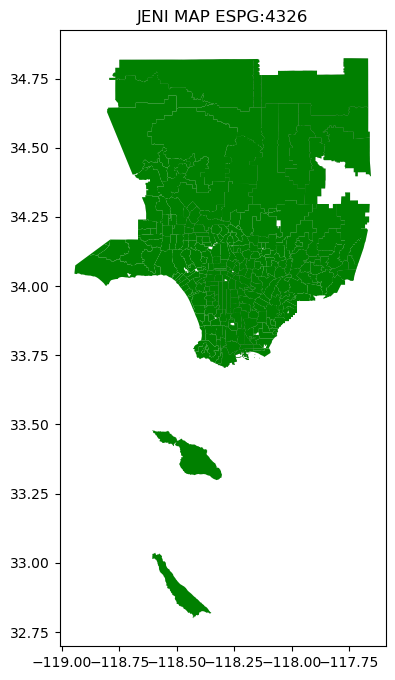

In [2]:
#2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean jenipctl

#plot
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(cmap='Greys', ax=ax, alpha=.5)
data.plot(ax=ax, markersize=10, color='g', legend=True)

ax.set_title("JENI MAP ESPG:4326");

# idk how to make legend

### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 
3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.
4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 


In [5]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

#load the box module from shapely to create box objects
from shapely.geometry import box
import seaborn as sns

#ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

In [18]:
#1. Clip the original data/Justice_Equity_Need_Index.geojson by the city of Long Beach boundary. 
# What should you always first check before working with multiple datasets?

#load data
jenidata = gpd.read_file('data/Justice_Equity_Need_Index.geojson')
lbdata = gpd.read_file('data/LB_City_Boundary.geojson')

#check CRS
print(jenidata.crs)
print(lbdata.crs)

#clip data
jenidata_clip = gpd.clip(jenidata, lbdata)

epsg:4326
epsg:4326


/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


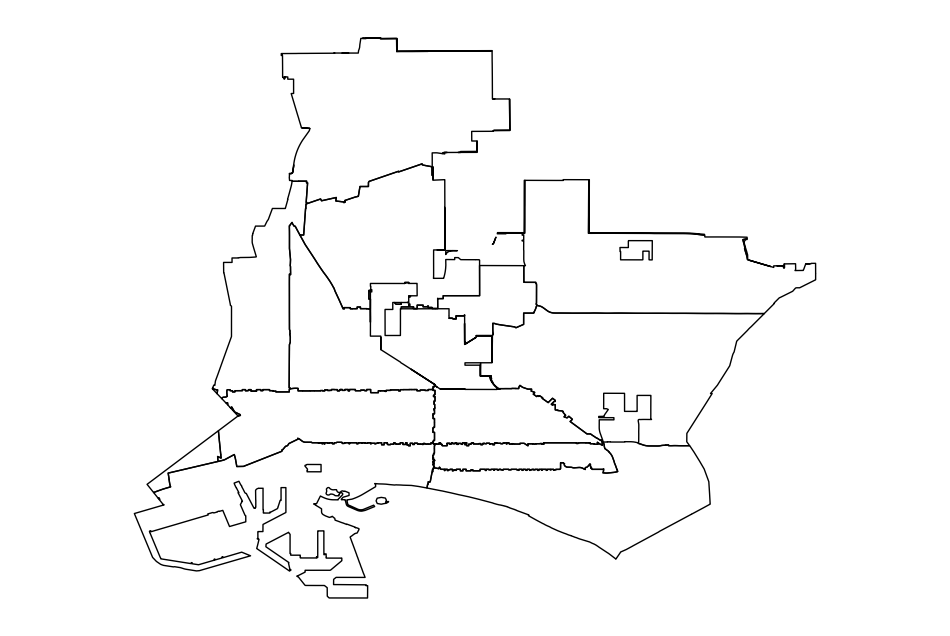

In [22]:
#2. Using the clipped version of the JENI dataset, spatially join the data/LB_Neighborhoods.geojson and your clipped dataset
jenidata_sj = gpd.sjoin(jenidata_clip,lbdata)

#3. Make a map that has ***different color categories*** for each Long Beach neighborhood by the jenipctl
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

jenidata_sj.plot(alpha=1,
                    facecolor="none",
                    edgecolor="black",
                    zorder=10,
                    ax=ax)



# Adjust legend location
leg = ax.get_legend()

ax.set_axis_off()
plt.axis('equal')
plt.show()

#4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods jenipctl rankings.


### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 
2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.
3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
4. Using the following function, calculate the distance from the LMU campus to each zip code. 
5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

In [21]:
#1. The JENI dataset we have been working with has information already grouped by zip code.
# Load the JENI dataset and select only the zip and csa columns
data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')

jenidata = data[["zip", "csa"]]

#2. Create the point for LMU's campus assuming the CRS to be epsg:4326. Reproject this point to epsg:3857.
jenidata = data.to_crs(epsg=3857)

# Import necessary modules
from shapely.geometry import Point
import pycrs

# Create the point representing LMU
lmu_lon = -118.4170
lmu_lat = 33.9710

# Create GeoDataFrame
LMU = gpd.GeoDataFrame([[Point(lmu_lon, lmu_lat)]], geometry='geometry', crs={'init': 'epsg:3857'}, columns=['geometry'])

#3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe).
# make a new column and name it centroid
jenidata['centroid'] = jenidata.centroid
print(jenidata.head(2))

# Did you receive a warning? What should you do?
print("No I did not receive a warning")

   OBJECTID    zip jenicategory  jenipctl  jenirank riskcategory  riskpctl  \
0         1  91108       Lowest       0.0       277       Lowest       0.4   
1         2  90631       Lowest       0.4       276       Lowest       2.9   

  driverscategory  driverspctl systemcategory  systempctl      neighborhood  \
0          Lowest          0.7         Lowest         3.3        San Marino   
1          Lowest          1.8         Lowest         0.7  La Habra Heights   

     sup_dist                  spa                       csa  SHAPE_Length  \
0  District 5  SPA 3 - San Gabriel        City of San Marino      0.177419   
1  District 4         SPA 7 - East  City of La Habra Heights      0.234952   

   SHAPE_Area                                           geometry  \
0    0.000962  MULTIPOLYGON (((-13147794.179 4047256.800, -13...   
1    0.001614  MULTIPOLYGON (((-13129326.139 4025429.029, -13...   

                            centroid  
0  POINT (-13148349.834 4045245.070)  
1  POINT 

/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [20]:
#4. Using the following function, calculate the distance from the LMU campus to each zip code.

def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

# Retrieve the geometry from Helsinki GeoDataFrame
jenigeom = jenidata.loc[0, 'geometry']

# Calculate the distances using our custom function called 'calculate_distance'
jenidist = jenidata.apply(calculate_distance, dest_geom=jenigeom, src_col='centroid', target_col='dist_to_lmu', axis=1)
#print(jenidist.head(10))


#5. What is the maximum distance from the LMU campus? 
# Which zip code does this pertain to? ***6666666666666666666666***
# What is the average distace to the LMU campus?

max_dist = jenidist['dist_to_lmu'].max()
mean_dist = jenidist['dist_to_lmu'].mean()

print("Maximum distance from LMU is %.0f km, the average distance from LMU is %.0f km" % (max_dist, mean_dist),)


Maximum distance from LMU is 129 km, the average distance from LMU is 32 km
